In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('features_30_sec - features_30_sec.csv')

In [ ]:
df = df.drop('filename', axis = 1)

In [ ]:
xcols = list(df.columns.values)[:-1]
ycols = list(df.columns.values)[-1:]

<h1>Complete the Following:</h1>
<ol>
  <li>One hot encode the y column.</li>
    <ul>
      <li>You can use the variable <strong>ycols</strong> from above which is the name of the y variable.</li>
      <li>Remember that the Pandas function to one hot encode is <strong>get_dummies()</strong> as we have seen in <strong>Day 3 Notebook</strong>.</li>
    </ul>
  <li>Scale the x columns.</li>
    <ul>
      <li>You can use the variable <strong>xcols</strong> from above which is the list of x variables.</li>
      <li>Use the function <strong>MinMaxScaler()</strong> which we saw an example of how to use in <strong>Day 7 Notebook</strong>.</li>
    </ul>
  <li>Split data into training and testing.</li>
    <ul>
      <li>Use <strong>train_test_split()</strong> as we have in <strong>Day 3 Notebook</strong>.</li>
      <li>As a parameter of train_test_split, set <strong>shuffle = True</strong> to shuffle rows.</li>
    </ul>
  <li>Build a sequential model with dense layers using keras.</li>
    <ul>
      <li>You saw how to do this in <strong>Day 7 Notebook</strong>.</li>
      <li>You can try out any activation function you want. I recommend testing <strong>relu, sigmoid, or linear</strong>.</li>
      <li>Incorporate as many layers as you want with as many incoming and outgoing nodes.</li>
      <li>Hint: in the first layer make sure you set the input size to be the number of x columns which you can get with the code <strong>len(xcols)</strong>.</li>
    </ul>
  <li>Predict for training and testing data.</li>
    <ul>
      <li>The outputs would be the probability that each sample is a certain class. Develop a function to map the highest predicted probability for a sample to a class.</li>
      <li>Hint: check each predicted sample and save the index of the highest value as the predicted class.</li>
    </ul>
  <li>Generate a confusion matrix for both the training and testing predictions.</li>
    <ul>
      <li>Use the function <strong>confusion_matrix()</strong> which we did in <strong>Day 3 Notebook</strong>.</li>
    </ul>
<ol>

In [ ]:
#1

In [ ]:
one_hot_encoded = pd.get_dummies(df[ycols])
one_hot_encoded

,label_blues,label_classical,label_country,label_disco,label_hiphop,label_jazz,label_metal,label_pop,label_reggae,label_rock
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,True


In [ ]:
#2

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df.loc[:, xcols])
x = scaler.transform(df.loc[:, xcols])

In [ ]:
#3

In [ ]:
shuffled_df = df.sample(n = len(df))
shuffled_df

x_train, x_test, y_train, y_test = train_test_split(x, one_hot_encoded, shuffle = True, test_size = 0.2)

In [ ]:
#4

In [ ]:
model = Sequential()
model.add(Dense(20, input_shape = (len(xcols),), activation = 'sigmoid'))
model.add(Dense(16, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
#5

In [74]:
model.fit(x_train, y_train, epochs = 2000)

Epoch 1/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 2/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.0661
Epoch 3/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 4/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0662
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.0664
Epoch 6/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.0663
Epoch 7/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 8/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.0663
Epoch 9/2000
25/25 [==============================] - 0s 7ms/step - loss: 0.0659
Epoch 10/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 11/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.0656
Epoch 12/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.0657
Epoch 13/2000
25/25 [====

In [75]:
y_train_prob = model.predict(x_train)
y_test_prob = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [76]:
def getClassLabels(y_prob):
  classLabels = []
  for i in y_prob:
    classLabels.append(np.argmax(i))
  return classLabels

In [ ]:
#6

<Axes: >

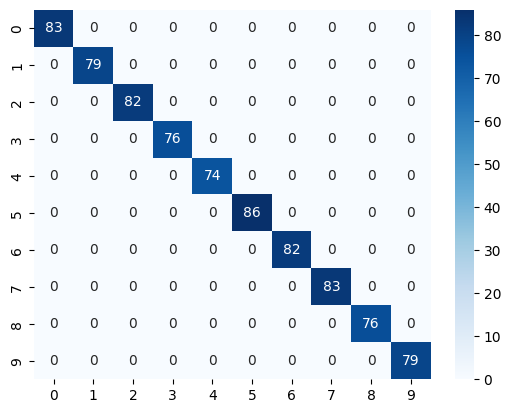

In [77]:
y_train_pred = getClassLabels(y_train_prob)
y_train_true = getClassLabels(np.array(y_train))
cmat_train = confusion_matrix(y_train_true, y_train_pred)
sns.heatmap(cmat_train, cmap = "Blues", annot = True)

<Axes: >

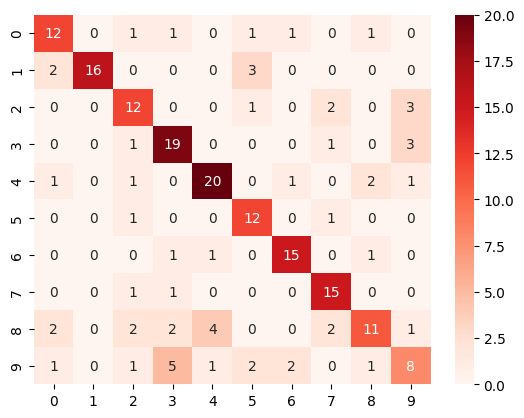

In [78]:
y_test_pred = getClassLabels(y_test_prob)
y_test_true = getClassLabels(np.array(y_test))
cmat_test = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cmat_test, cmap = "Reds", annot = True)

In [79]:
count = 0
for i in range(len(cmat_train)):
  count += cmat_train[i][i]
count/len(x_train)

1.0

In [80]:
count = 0
for i in range(len(cmat_test)):
  count += cmat_test[i][i]
count/len(x_test)

0.7